In [1]:
from IPython.display import display # allows for nicer printing of data frames
import pandas as pd

### Reading data


In [2]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp'] #col name of rating data 
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']  #col name of user data 
m_cols = ['movie_id', 'movie_title', 'release_date', 'video_rel', 'imdb', 'unknown', 'action', 
           'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 
          'horror', 'musical', 'mystery', 'romance', 'sicfi', 'thriller', 'war', 'western'] #col name of movie data

rat_data = pd.read_csv('ua.base', sep='\t', names=r_cols, encoding='latin-1')
user_data = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')
movie_data = pd.read_csv('u.item', sep='|', names=m_cols, encoding='latin-1')

C:\Users\Hardik\Anaconda3\envs\DAB300\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)



### Merging data 


In [4]:
rat1_data = pd.merge(rat_data, user_data, on = 'user_id')  # rat1_data = rat_data + user_data
final_data = pd.merge(rat1_data, movie_data, on = 'movie_id') # final_data = rat1_data + movie_data
final1_data = final_data.drop(columns = ['unix_timestamp', 'zip_code', 'release_date', 'movie_title', 'western', 'video_rel', 'imdb'])

In [5]:
# One-hot encoding
final1_data = pd.get_dummies(final1_data, columns = ['gender', 'occupation'])

In [6]:
#Taking subset of data
data_sub1 = final1_data[:2000] #First 2000 rows


### KNN Classification


In [7]:
#KNN Classifier | Taking rating as category(1,2,3,4,5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

feat = ['movie_id','age','gender_F', 'gender_M', 'occupation_administrator','occupation_artist','occupation_doctor',
        'occupation_educator','occupation_engineer','occupation_entertainment','occupation_executive',
        'occupation_healthcare','occupation_homemaker','occupation_lawyer','occupation_librarian',
        'occupation_marketing','occupation_none','occupation_other','occupation_programmer',
        'occupation_retired','occupation_salesman','occupation_scientist','occupation_student',
        'occupation_technician', 'occupation_writer']        
X = data_sub1[feat]  #Feature 
y = data_sub1.rating #Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
for n in [1, 3, 5, 9, 15]:
    print("n =", n)
    cla1 = KNeighborsClassifier(n_neighbors = n)
    cla1.fit(X_train, y_train)
    train_acc = cla1.score(X_train, y_train)
    test_acc = cla1.score(X_test, y_test)
    print("Training Accuracy: ", train_acc)
    print("Test Accuracy: ", test_acc)

n = 1
Training Accuracy:  0.852
Test Accuracy:  0.286
n = 3
Training Accuracy:  0.5713333333333334
Test Accuracy:  0.246
n = 5
Training Accuracy:  0.5293333333333333
Test Accuracy:  0.31
n = 9
Training Accuracy:  0.4806666666666667
Test Accuracy:  0.336
n = 15
Training Accuracy:  0.44866666666666666
Test Accuracy:  0.348


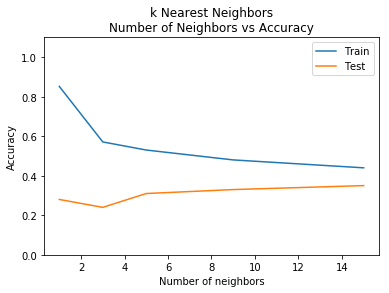

In [9]:
#Plot of Neighbor Vs Accuracy
import matplotlib.pyplot as plt

train_accuracies = [0.852, 0.571, 0.53, 0.48, 0.44]
test_accuracies = [0.28, 0.24, 0.31, 0.33, 0.35]
n_neighbors = [1, 3, 5, 9, 15]

plt.plot(n_neighbors, train_accuracies, label = "Train")
plt.plot(n_neighbors, test_accuracies, label = "Test")
plt.ylim(0, 1.1)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("k Nearest Neighbors\nNumber of Neighbors vs Accuracy")
plt.legend(loc = 0)
plt.show()


### Simple Recommender using Correlation


In [10]:
#Creating matrix of user,movie and its rating which will used for correlation
user_movie_rating = final_data.pivot_table(index='user_id', columns='movie_title', values='rating')

In [11]:
user_movie_rating.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#### Here we can take 'Nan' as movie not rated by user, we can also interpret as movie not watched

In [14]:
#Lets find correlation with particular movie

star_wars_ratings = user_movie_rating['Star Wars (1977)']
movies_like_star_wars= user_movie_rating.corrwith(star_wars_ratings)
corr_star_wars = pd.DataFrame(movies_like_star_wars, columns=['Correlation'])
corr_star_wars.dropna(inplace=True)
corr_star_wars.head()

,Correlation
movie_title,
'Til There Was You (1997),0.904534
1-900 (1994),-0.995871
101 Dalmatians (1996),0.184642
12 Angry Men (1957),0.189952
187 (1997),-0.002789


In [15]:
#Those are movies like star wars, we cannot directly recommend this movie
# because we don't know are those movie also rated many times or not.
corr_star_wars.sort_values('Correlation', ascending=False).head(10)

,Correlation
movie_title,
Commandments (1997),1.0
Man of the Year (1995),1.0
No Escape (1994),1.0
Stripes (1981),1.0
A Chef in Love (1996),1.0
Star Wars (1977),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Hurricane Streets (1998),1.0
Hollow Reed (1996),1.0


In [18]:
# making dataframe of movie and average rating count
ratings_mean_count = pd.DataFrame(final_data.groupby('movie_title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(final_data.groupby('movie_title')['rating'].count())

In [19]:
#To find most correlated movie using correlation and most rated by user
corr_star_wars= corr_star_wars.join(ratings_mean_count['rating_counts'])
corr_star_wars[corr_star_wars ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
movie_title,,
Star Wars (1977),1.000000,495
"Empire Strikes Back, The (1980)",0.741887,330
Return of the Jedi (1983),0.671386,439
Raiders of the Lost Ark (1981),0.507372,379
Pinocchio (1940),0.427219,94



### SVD using SurPRISE library


In [3]:
#SVD algorithm using surprise library

#importing library packages
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
 
rat = Reader(rating_scale=(1, 5)) #setting movie rating scale

#reading data from data frame
#Selecting feature and target
data = Dataset.load_from_df(rat_data[['user_id','movie_id','rating']], rat) 
train_set, test_set = train_test_split(data, test_size=.20, random_state = 0)

svd_m = SVD() 
svd_m.fit(train_set) #Fit train data 
svd_predict = svd_m.test(test_set) #Predicting on test data
accuracy.rmse(svd_predict) #to check accuracy using RMSE method

RMSE: 0.9330


0.9330096757669305

In [4]:
#Dictionary of movie title and movie id
movie_dict = dict(zip(movie_data.movie_title.tolist(), movie_data.movie_id.tolist()))

In [7]:
#Function for prediction
def predict_rating(userid):
    if userid in rat_data.user_id.unique():  #user id validation
        userid_list = rat_data[rat_data.user_id == userid].movie_id.tolist()
        dic = {k: v for k,v in movie_dict.items() if not v in userid_list}        
        predicted_dict = []
        for i, j in dic.items():     
            predicted = svd_m.predict(userid, j)
            predicted_dict.append((i, predicted[3])) 
        pred_movie = pd.DataFrame(predicted_dict, columns = ['movies', 'ratings'])
        pred_movie.sort_values('ratings', ascending=False, inplace=True)  
        pred_movie.set_index('movies', inplace=True)    
        return pred_movie.head(10)        
    else:
        print("User_id does not exist")
        return None

In [8]:
#Enter user id 
user_id = 20
predict_rating(user_id)

,ratings
movies,
"Usual Suspects, The (1995)",4.241866
"Grand Day Out, A (1992)",4.125543
"Shawshank Redemption, The (1994)",4.053747
Rear Window (1954),4.053665
Wallace & Gromit: The Best of Aardman Animation (1996),4.031411
"Maltese Falcon, The (1941)",4.029571
Citizen Kane (1941),3.989716
12 Angry Men (1957),3.980543
"Killing Fields, The (1984)",3.973261
